In [1]:
import pandas as pd
import numpy as np
from utils.modules import Value,Neuron,Layer,MLP
from utils.loss_funcs import softmax,cross_entropy_loss_logits
from utils.utils import build_graph
from sklearn.datasets import make_moons,make_blobs
import matplotlib.pyplot as plt
import torch

Implementing Cross Entropy Loss

In [2]:
a = []
b = [[Value(1.0),Value(2.0)],[Value(3.0),Value(4.0)]]
loss = cross_entropy_loss_logits(b,[0,1],True)

In [3]:
loss

Value(data=0.8132616875182227)

In [4]:
loss.backward()

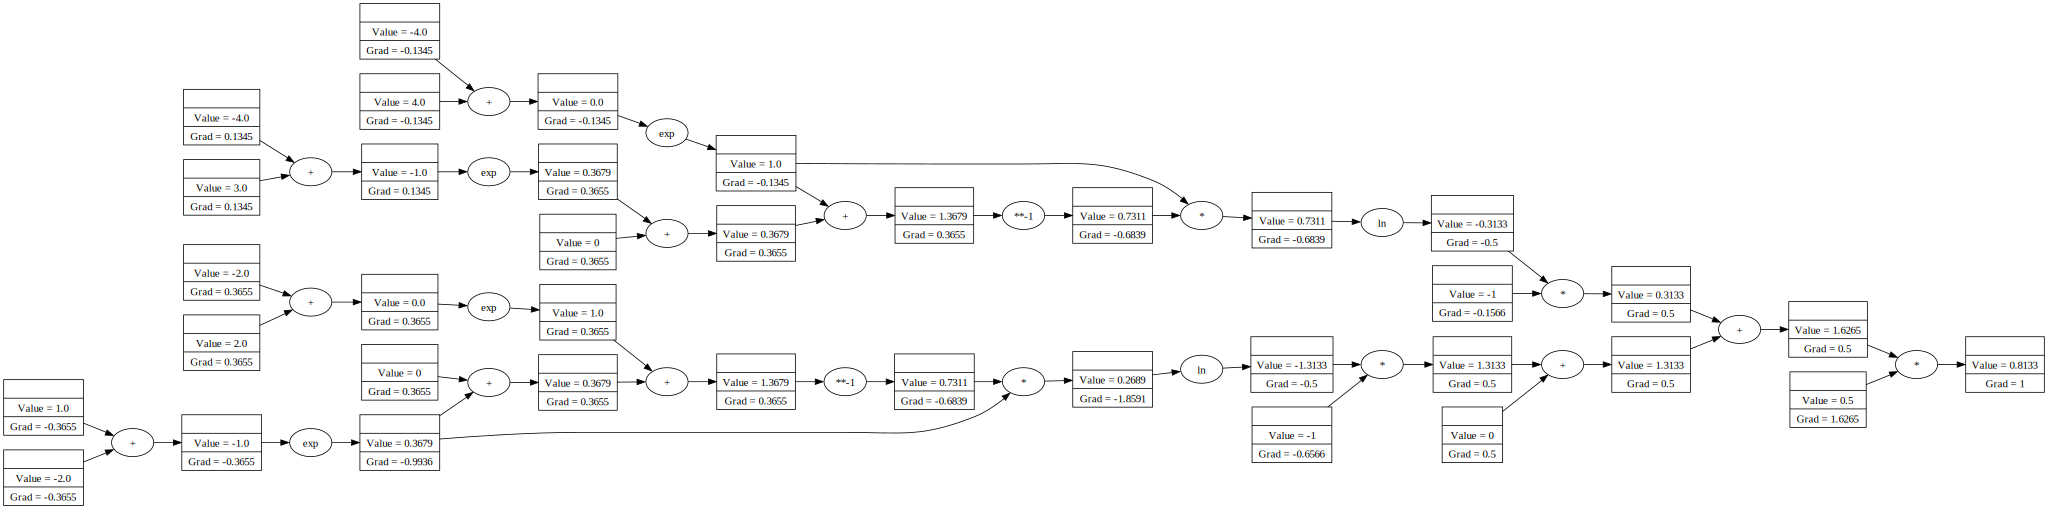

In [5]:
build_graph(loss)

Validating with Pytorch

In [6]:
ce = torch.nn.CrossEntropyLoss(reduction='sum')
vals = torch.tensor([[1,2],[3,4]]).float()
vals = vals.softmax(dim = 1)

In [7]:
vals

tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [8]:
vals = torch.tensor([[1,2],[3,4]]).float();vals.requires_grad = True
loss_pt = ce(vals,torch.tensor([0,1]))

In [9]:
loss_pt

tensor(1.6265, grad_fn=<NllLossBackward0>)

In [10]:
loss_pt.backward()

In [11]:
vals.grad

tensor([[-0.7311,  0.7311],
        [ 0.2689, -0.2689]])

In [12]:
x,y = make_moons(n_samples = 100,noise = 0.1)

In [13]:
x

array([[ 0.08297127, -0.13389779],
       [-0.46174126,  1.00715136],
       [-0.94150519, -0.09056214],
       [ 0.72689082,  0.66163917],
       [ 0.14780043,  0.1364346 ],
       [ 0.67073165,  0.57662809],
       [ 0.47242186,  0.87198143],
       [ 0.33212111, -0.23631327],
       [ 0.03456965,  1.07354692],
       [-0.99902159,  0.02585977],
       [ 0.8525252 , -0.32659298],
       [-0.04612184,  0.2949944 ],
       [ 0.18952815,  0.96602808],
       [ 0.83476032,  0.67993681],
       [ 1.5332749 , -0.21376956],
       [-0.96924375, -0.07273778],
       [ 0.76309753, -0.47892807],
       [-0.24007827,  0.98752405],
       [ 0.52038829,  1.0141157 ],
       [ 1.39056144, -0.510972  ],
       [ 0.11972362,  0.82256007],
       [-0.69538465,  0.83885055],
       [ 0.25492315, -0.17169732],
       [ 1.23853204, -0.43206689],
       [-0.58097074,  0.83552472],
       [ 1.89695752, -0.21191487],
       [-0.05335391,  0.26375336],
       [ 0.37834888, -0.33476925],
       [ 2.1726018 ,

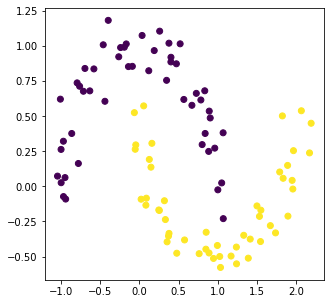

In [14]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.scatter(x[:,0],x[:,1],c = y)

In [16]:
model = MLP(2,[10,10,2])
iters = 200

for i in range(iters):
    ys = [model(instance) for instance in x]
    loss = cross_entropy_loss_logits(ys,y)
    #backward pass
    for p in model.parameters():
        p.grad = 0
    loss.backward()
    # learning_rate = 0.3 - 0.9*i/100
    for p in model.parameters():
        p.data += -0.1 * p.grad

    print(i,loss.item())

0 0.932961411229726
1 0.683394427096804
2 0.6309482132134875
3 0.6097380845734575
4 0.594417102336135
5 0.5813781293064687
6 0.5697109202672412
7 0.5590733895857083
8 0.5489886994441303
9 0.5397275963113921
10 0.530934995170101
11 0.5228407739669851
12 0.5155392554035699
13 0.508869959072274
14 0.5024810971882164
15 0.49628377449947914
16 0.4903131667252014
17 0.48454443453876667
18 0.479033374645773
19 0.4737146264377018
20 0.468606024754512
21 0.46351125163441204
22 0.45839018015685845
23 0.45335238410774514
24 0.44843328390621134
25 0.44353215679477326
26 0.4387922183971339
27 0.4341988196627563
28 0.42964246032757625
29 0.4252166656851854
30 0.42088521894682657
31 0.4166935288924174
32 0.41251827906822763
33 0.4084358838795082
34 0.4044233068342388
35 0.4001816610127297
36 0.3960203768371264
37 0.39198406801086555
38 0.3880565364804457
39 0.3843761760164819
40 0.38088523172537514
41 0.3773141134773133
42 0.37329679881098393
43 0.3692882350550531
44 0.36492651287243716
45 0.36047157